In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
df=pd.read_csv('customer-churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [5]:
df.drop(['customerID'],axis='columns',inplace=True)

In [6]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [7]:
df.TotalCharges.values
# type is string need to convert it to float 

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [8]:
# to convert string to numeber
# pd.to_numeric(df.TotalCharges) - TotalCharges contains some blank strings ,we will get some error
# first need to remove that blank strings

# first find out those results
pd.to_numeric(df.TotalCharges,errors='coerce').isnull()
# coerce will ignore the errors that we got earlier
# results with empty string at TotalCharges
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [9]:
# We have total 7000 rows and 11 contains empty string ,so we can ignore those 11 
df1=df[df['TotalCharges']!=' ']
df1.shape

(7032, 20)

In [10]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [11]:
df1.TotalCharges=pd.to_numeric(df1.TotalCharges)

c:\users\admin\appdata\local\programs\python\python38\lib\site-packages\pandas\core\generic.py:5491: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [12]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [13]:
# tenure = time,here no of months
# plot histogram of tenure vs no of customers
customers_not_churn=df[df.Churn=='No']
customers_churn=df[df.Churn=='Yes']

tenure_not_churn=customers_not_churn.tenure
tenure_churn=customers_churn.tenure

In [14]:
customers_not_churn.shape

(5174, 20)

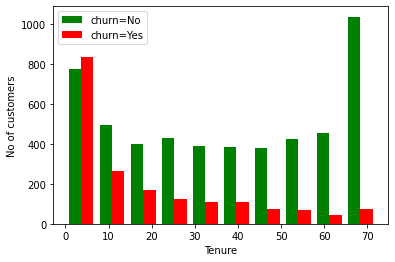

In [15]:
plt.xlabel('Tenure')
plt.ylabel('No of customers')

plt.hist([tenure_not_churn,tenure_churn],color=['green','red'],label=['churn=No','churn=Yes'])
plt.legend()

In [16]:
# Many of the columns are yes, no etc. Let's print unique values in object columns to see data values
df1.gender.unique()
# this is for one column

array(['Female', 'Male'], dtype=object)

In [17]:
def print_unique_values(df):
    for column in df.columns:
        if df[column].dtypes=='object':
            print("column={}, unique={}".format(column,df[column].unique()))
            
print_unique_values(df1)

column=gender, unique=['Female' 'Male']
column=Partner, unique=['Yes' 'No']
column=Dependents, unique=['No' 'Yes']
column=PhoneService, unique=['No' 'Yes']
column=MultipleLines, unique=['No phone service' 'No' 'Yes']
column=InternetService, unique=['DSL' 'Fiber optic' 'No']
column=OnlineSecurity, unique=['No' 'Yes' 'No internet service']
column=OnlineBackup, unique=['Yes' 'No' 'No internet service']
column=DeviceProtection, unique=['No' 'Yes' 'No internet service']
column=TechSupport, unique=['No' 'Yes' 'No internet service']
column=StreamingTV, unique=['No' 'Yes' 'No internet service']
column=StreamingMovies, unique=['No' 'Yes' 'No internet service']
column=Contract, unique=['Month-to-month' 'One year' 'Two year']
column=PaperlessBilling, unique=['Yes' 'No']
column=PaymentMethod, unique=['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
column=Churn, unique=['No' 'Yes']


In [18]:
# some of the columns have no internet service or no phone service, that can be replaced with a simple No
df1.replace('No internet service','No',inplace=True)
df1.replace('No phone service','No',inplace=True)

c:\users\admin\appdata\local\programs\python\python38\lib\site-packages\pandas\core\frame.py:4521: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [19]:

print_unique_values(df1)

column=gender, unique=['Female' 'Male']
column=Partner, unique=['Yes' 'No']
column=Dependents, unique=['No' 'Yes']
column=PhoneService, unique=['No' 'Yes']
column=MultipleLines, unique=['No' 'Yes']
column=InternetService, unique=['DSL' 'Fiber optic' 'No']
column=OnlineSecurity, unique=['No' 'Yes']
column=OnlineBackup, unique=['Yes' 'No']
column=DeviceProtection, unique=['No' 'Yes']
column=TechSupport, unique=['No' 'Yes']
column=StreamingTV, unique=['No' 'Yes']
column=StreamingMovies, unique=['No' 'Yes']
column=Contract, unique=['Month-to-month' 'One year' 'Two year']
column=PaperlessBilling, unique=['Yes' 'No']
column=PaymentMethod, unique=['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
column=Churn, unique=['No' 'Yes']


In [20]:
# Convert Yes and No to 1 or 0
# df1.replace('Yes',1,inplace=True)
# df1.replace('No',0,inplace=True)
# We will avoid above as it will also convert No InternetService column into 0

yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for col in yes_no_columns:
    df1[col].replace({'Yes':1,'No':0},inplace=True)

c:\users\admin\appdata\local\programs\python\python38\lib\site-packages\pandas\core\series.py:4479: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [21]:
for col in df1.columns:
    print("Column={}, Values={}".format(col,df1[col].unique()))

Column=gender, Values=['Female' 'Male']
Column=SeniorCitizen, Values=[0 1]
Column=Partner, Values=[1 0]
Column=Dependents, Values=[0 1]
Column=tenure, Values=[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
Column=PhoneService, Values=[0 1]
Column=MultipleLines, Values=[0 1]
Column=InternetService, Values=['DSL' 'Fiber optic' 'No']
Column=OnlineSecurity, Values=[0 1]
Column=OnlineBackup, Values=[1 0]
Column=DeviceProtection, Values=[0 1]
Column=TechSupport, Values=[0 1]
Column=StreamingTV, Values=[0 1]
Column=StreamingMovies, Values=[0 1]
Column=Contract, Values=['Month-to-month' 'One year' 'Two year']
Column=PaperlessBilling, Values=[1 0]
Column=PaymentMethod, Values=['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Column=MonthlyCharges, Values=[29.85 56.95 53.85 ... 63.1  44

In [22]:
df1['gender'].replace({'Female':1,'Male':0},inplace=True)

In [23]:
df2 = pd.get_dummies(data=df1, columns=['InternetService','Contract','PaymentMethod'])

In [24]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

In [25]:
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [26]:
X=df2.drop(['Churn'],axis='columns')
y=df2.Churn

In [27]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [28]:
X_train.shape

(5625, 26)

In [29]:
X_test.shape

(1407, 26)

In [30]:
import tensorflow as tf
from tensorflow import keras
# 26 columns
model = keras.Sequential([
    keras.layers.Dense(26,input_shape=(26,),activation='relu'),
    keras.layers.Dense(15,activation='relu'),
#     classification 0 or 1 hence 1 neuron
    keras.layers.Dense(1,activation='sigmoid'),
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train,y_train,epochs=100)

Epoch 1/100
176/176 [==============================] - 5s 3ms/step - loss: 0.5183 - accuracy: 0.7230
Epoch 2/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4283 - accuracy: 0.7931
Epoch 3/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4234 - accuracy: 0.8014
Epoch 4/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4198 - accuracy: 0.7993
Epoch 5/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4180 - accuracy: 0.8032
Epoch 6/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4162 - accuracy: 0.8005
Epoch 7/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4142 - accuracy: 0.8059
Epoch 8/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4143 - accuracy: 0.8050
Epoch 9/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4123 - accuracy: 0.8011
Epoch 10/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4104 - accura

176/176 [==============================] - 0s 2ms/step - loss: 0.3690 - accuracy: 0.8233
Epoch 81/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3688 - accuracy: 0.8260: 0s - loss: 0.3545 - ac
Epoch 82/100
176/176 [==============================] - 0s 3ms/step - loss: 0.3695 - accuracy: 0.8236
Epoch 83/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3684 - accuracy: 0.8245
Epoch 84/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3669 - accuracy: 0.8254
Epoch 85/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3659 - accuracy: 0.8252
Epoch 86/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3668 - accuracy: 0.8272
Epoch 87/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3668 - accuracy: 0.8260
Epoch 88/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3668 - accuracy: 0.8233
Epoch 89/100
176/176 [==============================] - 0s 2ms/step - l

In [32]:
model.evaluate(X_test,y_test)

44/44 [==============================] - 0s 2ms/step - loss: 0.4633 - accuracy: 0.7910


[0.4633367955684662, 0.7910447716712952]

In [34]:
yp=model.predict(X_test)
yp
# these results are because of sigmoid

array([[0.35534257],
       [0.03644234],
       [0.22575688],
       ...,
       [0.6059618 ],
       [0.24443778],
       [0.43603927]], dtype=float32)

In [39]:
# if value>0.5 then 1 else 0
# y_pred=[]
# for value in yp:
#     if value > 0.5:
#         y_pred.append(1)
#     else:
#         y_pred.append(0)

y_pred=[1 if value>0.5 else 0 for value in yp]


In [40]:
y_pred[:5]

[0, 0, 0, 1, 1]

In [41]:
y_test[:5]

5561    0
5814    0
2645    0
3983    1
6438    1
Name: Churn, dtype: int64

In [43]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))
# this can be understand using confusion matrix
# check codebasics code

              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1038
           1       0.62      0.51      0.56       369

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407

